# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_4")
network_file = os.path.join(network_path, "network-synapses.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_4-A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_4-A.hdf5")
duration = 18

# Local path for Snudda data
snudda_data = "/home/hjorth/HBP/BasalGangliaData/data"

# Plot network

Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


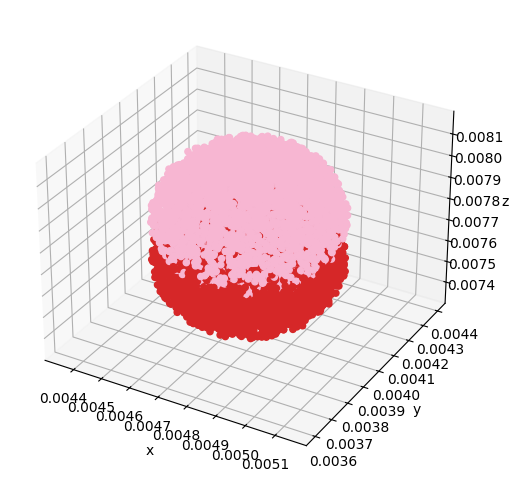

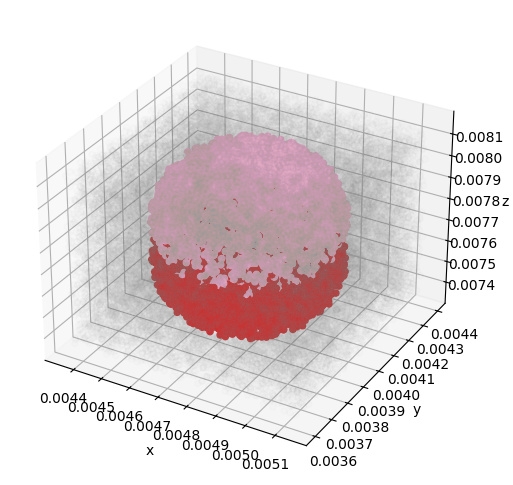

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path, snudda_data=snudda_data)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


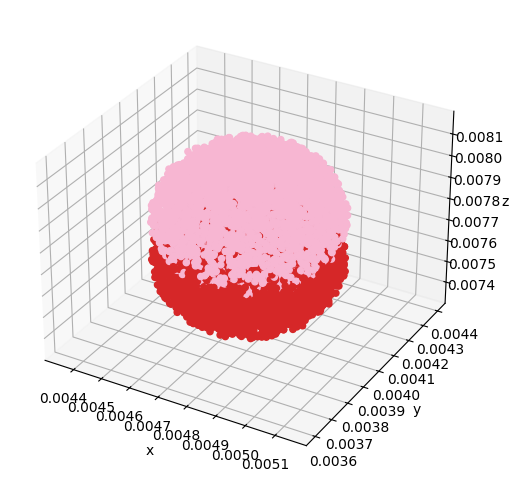

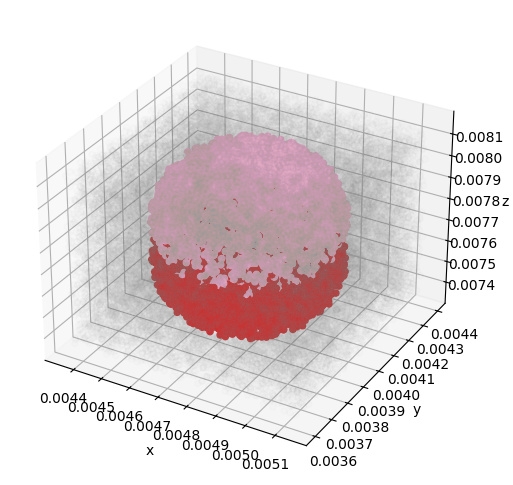

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file, snudda_data=snudda_data)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

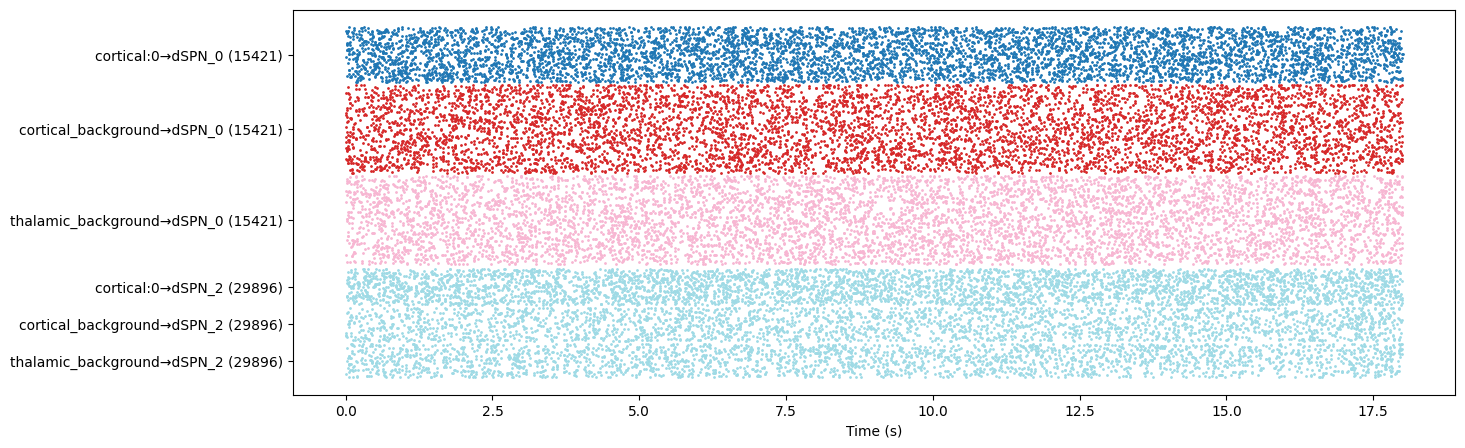

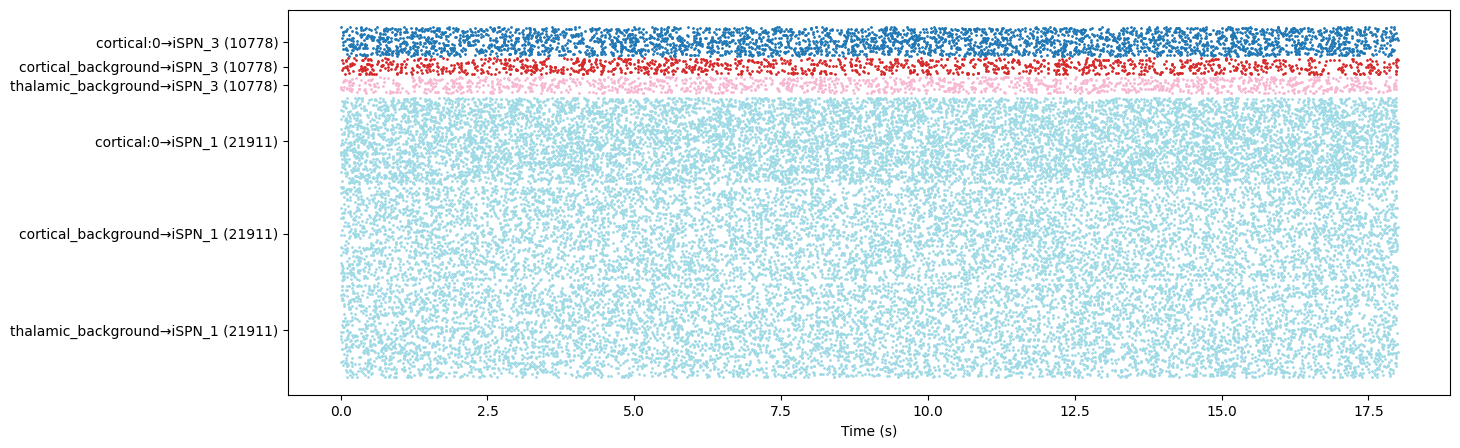

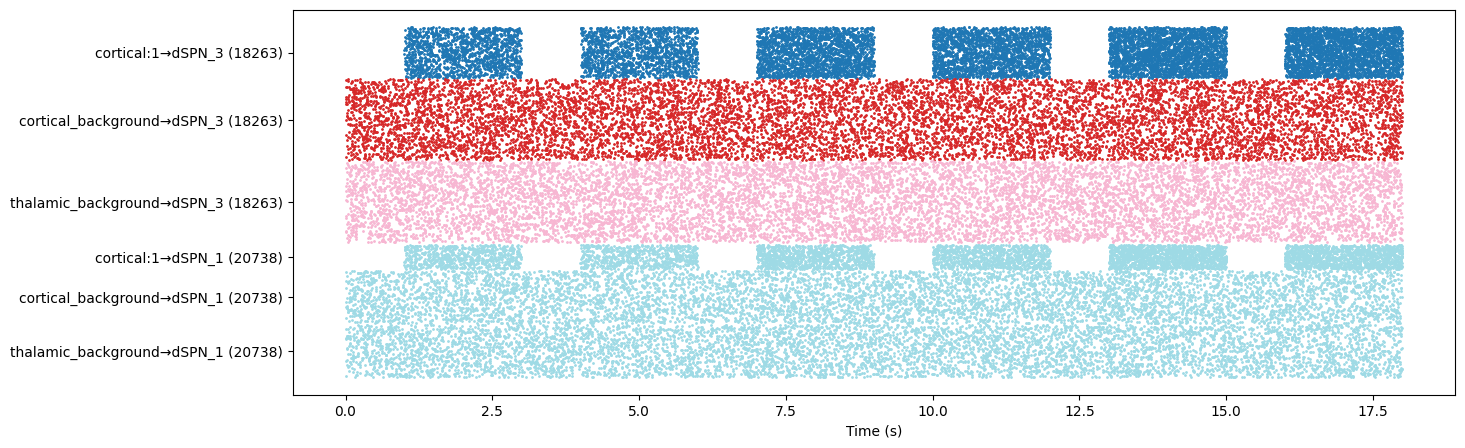

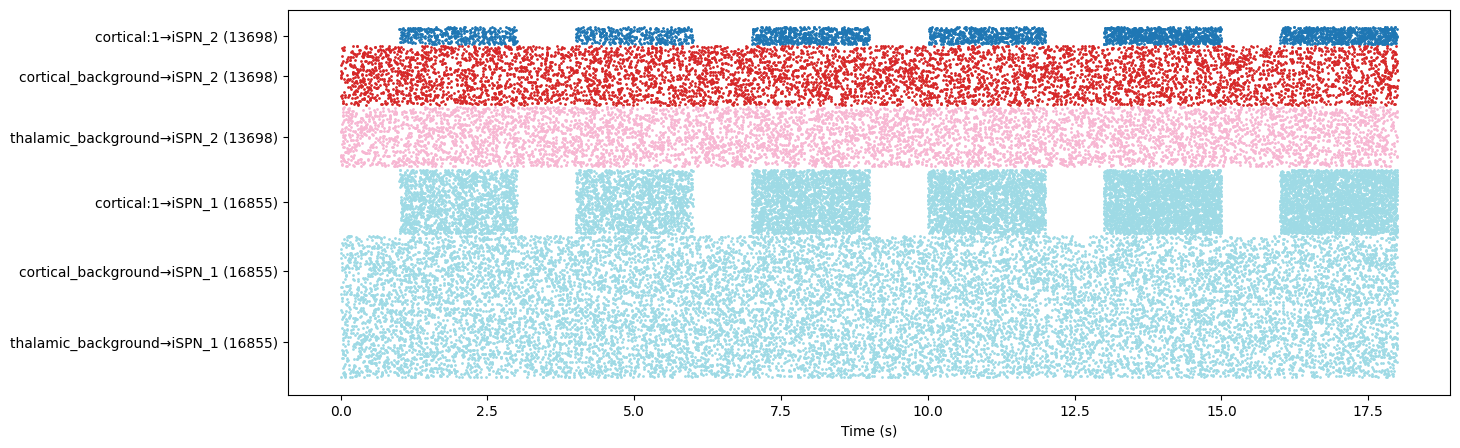

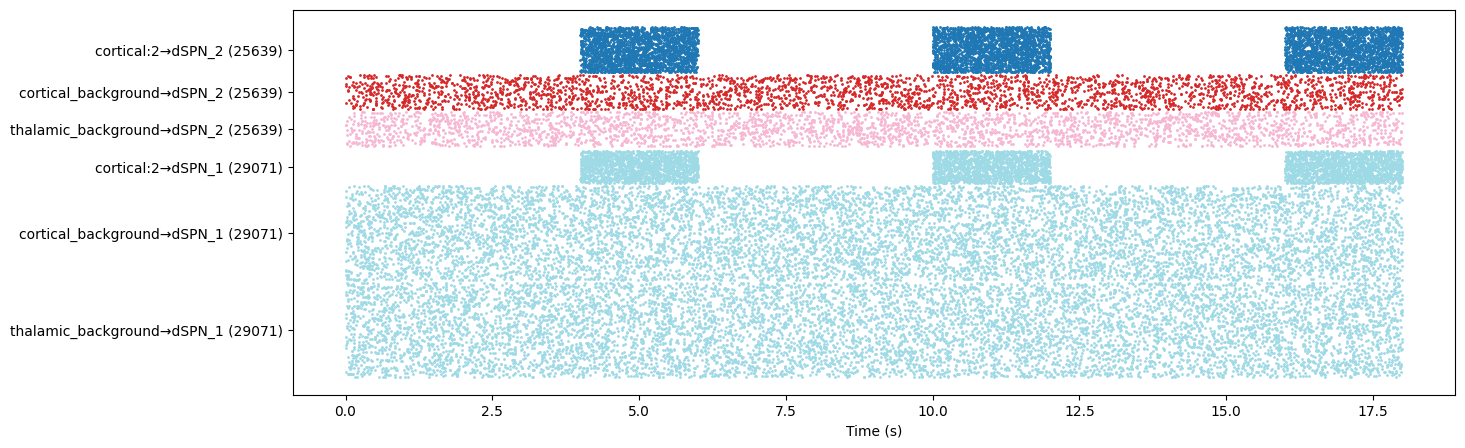

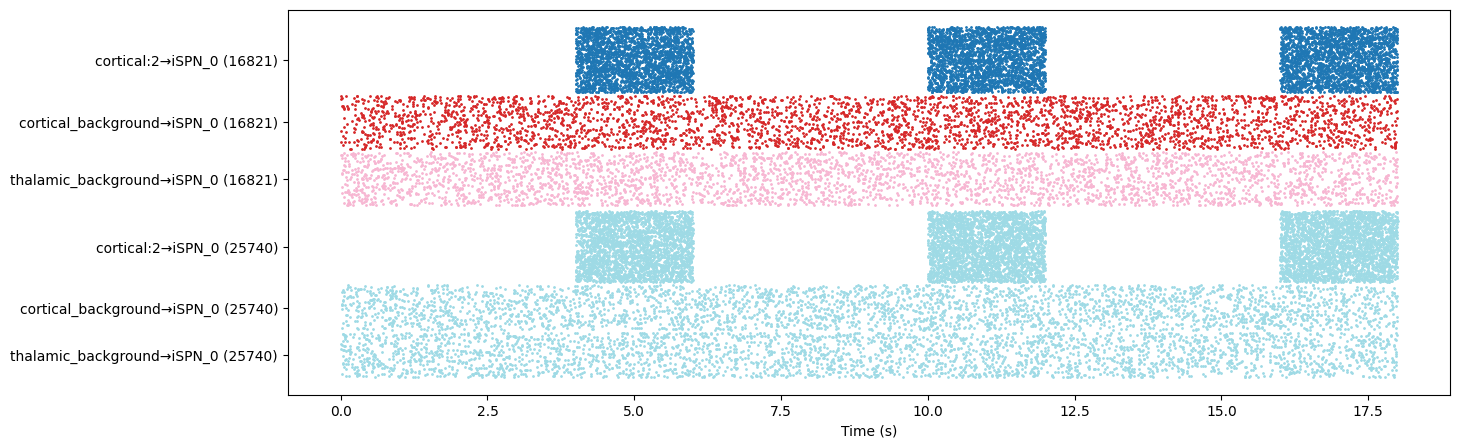

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")

spi = PlotInput(input_file, network_file)

spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_4/simulation/output-with-synapses-sten_4-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
34: (dSPN_0, p510bab86, mc710c1a4)
39: (dSPN_0, p1863c9a5, mf702205f)
511: (LTS_0, p94d54b1c, m803558b5)
513: (LTS_1, pcec5cf27, m8ded5e00)
514: (LTS_1, p793a3d75, ma4dacccf)
516: (LTS_1, pe2b0b6c2, ma4dacccf)
584: (dSPN_0, pb0529fb9, m22be6817)
1021: (LTS_0, p7f931884, m803558b5)
1023: (LTS_1, p54dfea77, m8ded5e00)
1024: (FS_0, pb1ef6b01, mb1b67bcc)
1033: (dSPN_0, p1863c9a5, m37886c78)
1042: (dSPN_0, pb0529fb9, m22be6817)
1070: (dSPN_0, p1863c9a5, m22be6817)
1527: (LTS_1, pd2ca4eaf, m803558b5)
2502: (LTS_0, p1fd33c8c, m803558b5)
2503: (LTS_0, pe9c8b984, m803558b5)
2504: (LTS_1, p047a6bb7, mda52699c)
2505: (LTS_1, p1a0c46fe, m8ded5e00)
2536: (dSPN_0, p1863c9a5, mc710c1a4)
2564: (dSPN_0, p8bf90d1f, m37886c78)
3012: (LTS_0, p1fd33c8c, m803558b5)
3013: (LTS_0, p94d54b1c, m803558b5)
3014: (LTS_0, p1fd33c8c, m803558b5)
3015: (LT

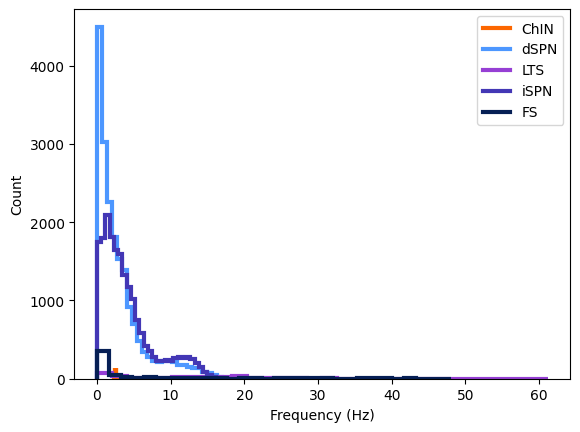

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_4/figures/spike-frequency-pop-units0-1-2.pdf


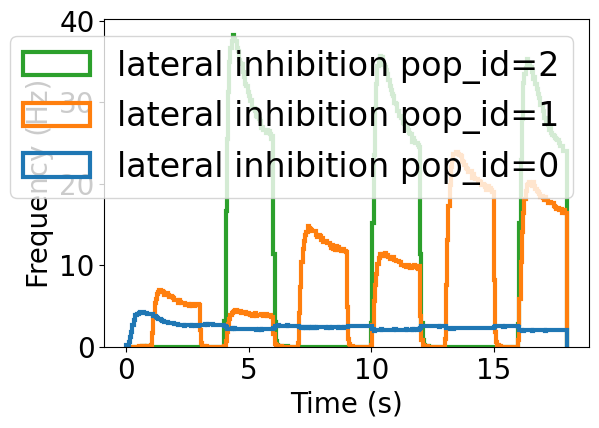

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_4/simulation/output-no-synapses-sten_4-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
45: (dSPN_0, p8bf90d1f, m22be6817)
511: (LTS_0, p94d54b1c, m803558b5)
513: (LTS_1, pcec5cf27, m8ded5e00)
514: (LTS_1, p793a3d75, ma4dacccf)
516: (LTS_1, pe2b0b6c2, ma4dacccf)
565: (dSPN_0, p1863c9a5, mc710c1a4)
572: (dSPN_0, pb0529fb9, m9fda9b20)
584: (dSPN_0, pb0529fb9, m22be6817)
1021: (LTS_0, p7f931884, m803558b5)
1023: (LTS_1, p54dfea77, m8ded5e00)
1024: (FS_0, pb1ef6b01, mb1b67bcc)
1064: (dSPN_0, pb0529fb9, mf702205f)
1527: (LTS_1, pd2ca4eaf, m803558b5)
1571: (dSPN_0, p7aa400d6, mbb8e5b24)
2502: (LTS_0, p1fd33c8c, m803558b5)
2503: (LTS_0, pe9c8b984, m803558b5)
2504: (LTS_1, p047a6bb7, mda52699c)
2505: (LTS_1, p1a0c46fe, m8ded5e00)
3012: (LTS_0, p1fd33c8c, m803558b5)
3013: (LTS_0, p94d54b1c, m803558b5)
3014: (LTS_0, p1fd33c8c, m803558b5)
3015: (LTS_1, pb5a5193d, mda52699c)
3156: (dSPN_2, pb267a31a, mf0350288)
3469: (LTS_1

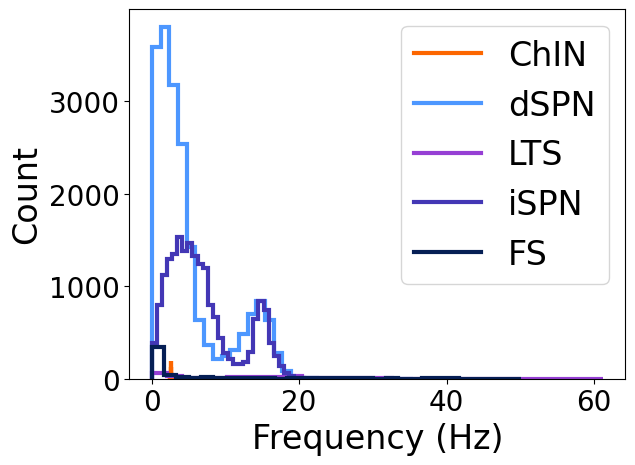

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_4/figures/spike-frequency-pop-units0-1-2.pdf


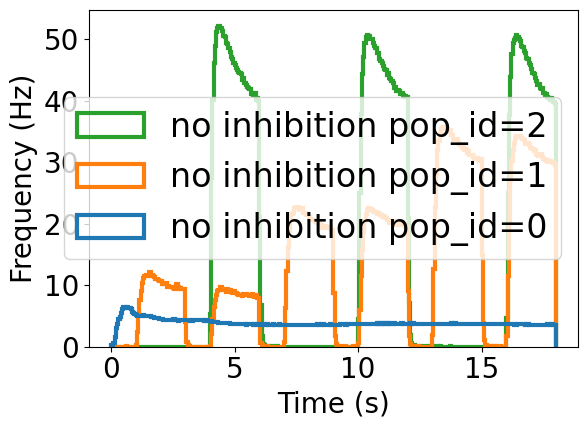

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_4/figures/spike-frequency-pop-units0-1-2.pdf


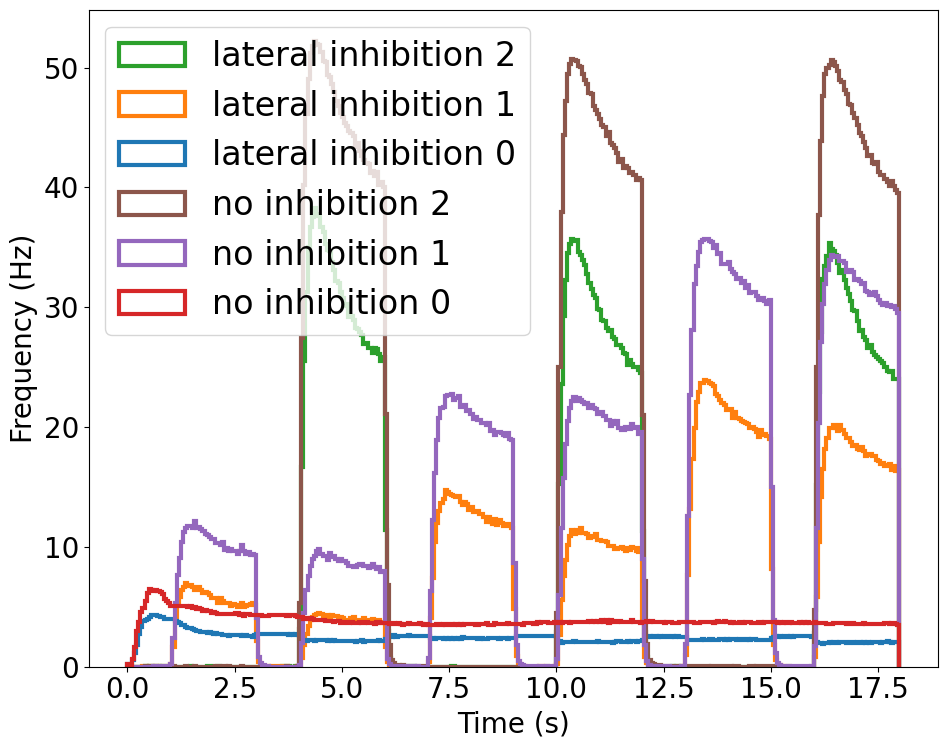

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)

In [13]:
time_ranges = [(2,3), (5,6), (8,9), (11,12), (14,15), (17,18)]

pop_id0 = spr.snudda_load.get_population_unit_members(population_unit=0)
pop_id1 = spr.snudda_load.get_population_unit_members(population_unit=1)
pop_id2 = spr.snudda_load.get_population_unit_members(population_unit=2)

with_lat_freq_table0 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id0, time_ranges=time_ranges)
with_lat_freq_table1 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
with_lat_freq_table2 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

no_lat_freq_table0 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id0, time_ranges=time_ranges)
no_lat_freq_table1 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
no_lat_freq_table2 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

In [14]:
with_lat_freq0_mean = np.mean(with_lat_freq_table0, axis=0)
with_lat_freq1_mean = np.mean(with_lat_freq_table1, axis=0)
with_lat_freq2_mean = np.mean(with_lat_freq_table2, axis=0)

no_lat_freq0_mean = np.mean(no_lat_freq_table0, axis=0)
no_lat_freq1_mean = np.mean(no_lat_freq_table1, axis=0)
no_lat_freq2_mean = np.mean(no_lat_freq_table2, axis=0)

n0_cells = with_lat_freq_table0.shape[0]
n1_cells = with_lat_freq_table1.shape[0]
n2_cells = with_lat_freq_table2.shape[0]

# Standard error of the mean
with_lat_freq0_std = np.std(with_lat_freq_table0, axis=0) / np.sqrt(n0_cells)
with_lat_freq1_std = np.std(with_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
with_lat_freq2_std = np.std(with_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

no_lat_freq0_std = np.std(no_lat_freq_table0, axis=0) / np.sqrt(n0_cells)
no_lat_freq1_std = np.std(no_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
no_lat_freq2_std = np.std(no_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

In [15]:
print("With lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std, freq0_mean, freq0_std in zip(with_lat_freq1_mean, with_lat_freq1_std, with_lat_freq2_mean,with_lat_freq2_std,with_lat_freq0_mean,with_lat_freq0_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}\tFreq 0: {freq0_mean:.2f} +/- {freq0_std:.2f}")

With lateral inhibition
Freq 1: 5.28 +/- 0.06	Freq 2: 0.01 +/- 0.00	Freq 0: 2.65 +/- 0.02
Freq 1: 3.88 +/- 0.06	Freq 2: 27.73 +/- 0.17	Freq 0: 2.14 +/- 0.02
Freq 1: 12.30 +/- 0.11	Freq 2: 0.00 +/- 0.00	Freq 0: 2.36 +/- 0.02
Freq 1: 9.99 +/- 0.11	Freq 2: 26.73 +/- 0.18	Freq 0: 2.10 +/- 0.02
Freq 1: 20.16 +/- 0.15	Freq 2: 0.00 +/- 0.00	Freq 0: 2.28 +/- 0.02
Freq 1: 17.27 +/- 0.15	Freq 2: 25.95 +/- 0.19	Freq 0: 2.05 +/- 0.02


In [16]:
print("No lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std, freq0_mean, freq0_std in zip(no_lat_freq1_mean, no_lat_freq1_std, no_lat_freq2_mean,no_lat_freq2_std, no_lat_freq0_mean,no_lat_freq0_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}\tFreq 0: {freq0_mean:.2f} +/- {freq0_std:.2f}")

No lateral inhibition
Freq 1: 9.82 +/- 0.09	Freq 2: 0.01 +/- 0.00	Freq 0: 4.39 +/- 0.02
Freq 1: 8.41 +/- 0.08	Freq 2: 42.71 +/- 0.11	Freq 0: 3.68 +/- 0.02
Freq 1: 19.92 +/- 0.11	Freq 2: 0.00 +/- 0.00	Freq 0: 3.56 +/- 0.02
Freq 1: 20.22 +/- 0.12	Freq 2: 42.65 +/- 0.11	Freq 0: 3.77 +/- 0.02
Freq 1: 31.66 +/- 0.11	Freq 2: 0.02 +/- 0.01	Freq 0: 3.71 +/- 0.02
Freq 1: 30.84 +/- 0.11	Freq 2: 41.86 +/- 0.12	Freq 0: 3.58 +/- 0.02


In [17]:
with_lat_n_firing1 = np.sum(with_lat_freq_table1 > 0, axis=0)
with_lat_n_firing2 = np.sum(with_lat_freq_table2 > 0, axis=0)

no_lat_n_firing1 = np.sum(no_lat_freq_table1 > 0, axis=0)
no_lat_n_firing2 = np.sum(no_lat_freq_table2 > 0, axis=0)

In [18]:
print("With lateral inhibition")
for n1_active, n2_active in zip(with_lat_n_firing1, with_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

With lateral inhibition
Neurons active 1: 3536/4000	Neurons active 2: 13/4000
Neurons active 1: 3149/4000	Neurons active 2: 3972/4000
Neurons active 1: 3896/4000	Neurons active 2: 13/4000
Neurons active 1: 3717/4000	Neurons active 2: 3945/4000
Neurons active 1: 3937/4000	Neurons active 2: 12/4000
Neurons active 1: 3871/4000	Neurons active 2: 3916/4000


In [19]:
print("No lateral inhibition")
for n1_active, n2_active in zip(no_lat_n_firing1, no_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

No lateral inhibition
Neurons active 1: 3768/4000	Neurons active 2: 31/4000
Neurons active 1: 3685/4000	Neurons active 2: 3987/4000
Neurons active 1: 3940/4000	Neurons active 2: 15/4000
Neurons active 1: 3928/4000	Neurons active 2: 3985/4000
Neurons active 1: 3964/4000	Neurons active 2: 17/4000
Neurons active 1: 3963/4000	Neurons active 2: 3972/4000


In [20]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [21]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_4/network-synapses.hdf5
Loading input info from ../networks/sten_4/input-spikes.hdf5
Loading ../networks/sten_4/simulation/output-with-synapses-sten_4-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
34: (dSPN_0, p510bab86, mc710c1a4)
39: (dSPN_0, p1863c9a5, mf702205f)
511: (LTS_0, p94d54b1c, m803558b5)
513: (LTS_1, pcec5cf27, m8ded5e00)
514: (LTS_1, p793a3d75, ma4dacccf)
516: (LTS_1, pe2b0b6c2, ma4dacccf)
584: (dSPN_0, pb0529fb9, m22be6817)
1021: (LTS_0, p7f931884, m803558b5)
1023: (LTS_1, p54dfea77, m8ded5e00)
1024: (FS_0, pb1ef6b01, mb1b67bcc)
1033: (dSPN_0, p1863c9a5, m37886c78)
1042: (dSPN_0, pb0529fb9, m22be6817)
1070: (dSPN_0, p1863c9a5, m22be6817)
1527: (LTS_1, pd2ca4eaf, m803558b5)
2502: (LTS_0, p1fd33c8c, m803558b5)
2503: (LTS_0, pe9c8b984, m803558b5)
2504: (LTS_1, p047a6bb7, mda52699c)
2505: (LTS_1, p1a0c46fe, m8ded5e00)
2536: (dSPN_0, p1863c9a5, mc710c1a4)
2564: (dSPN_0, p8bf90d1f, 

In [22]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [1053 1064 1074 1095 1162 1186 1188 1201 1209 1250 1262 1375 1384 1438
 1443 1465 1500 1505 1538 1575 1583 1698 1834 2012 2014 2015 2016 2022
 2024 2027]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_4/figures/Network-voltage-trace--dSPN-iSPN.pdf


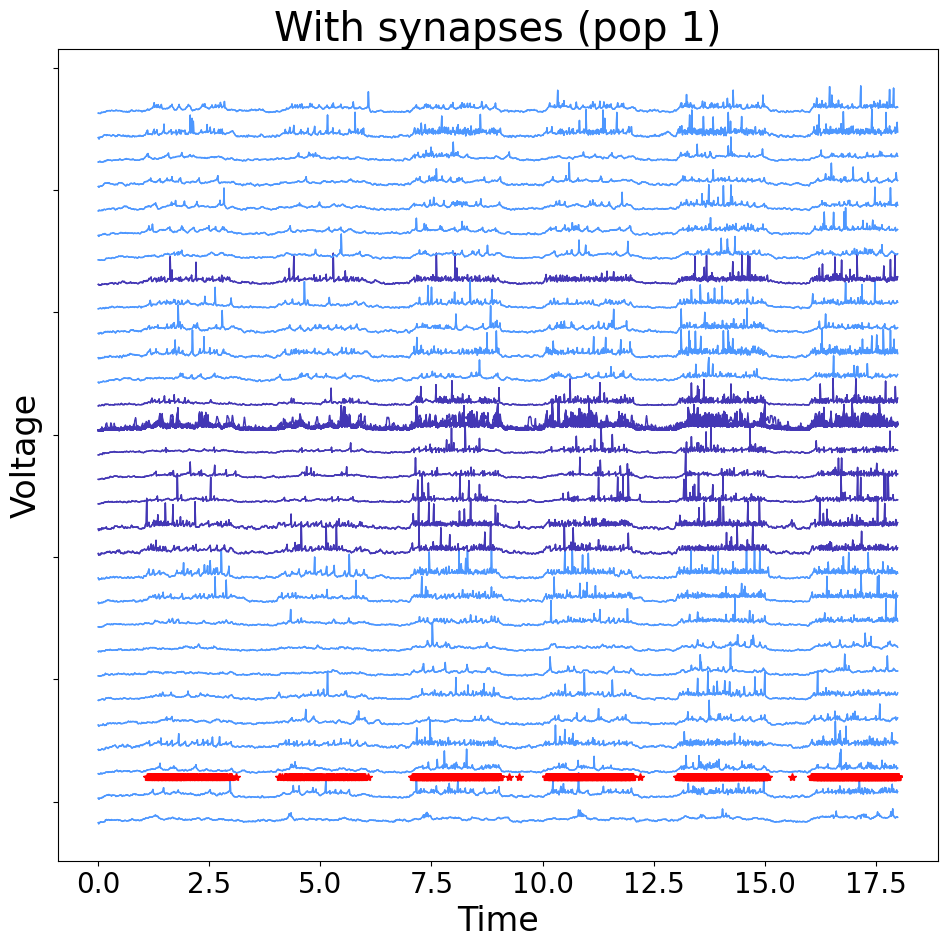

In [23]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [2563 2657 2663 2949 3049 3053 3061 3066 3083 3110 3111 3132 3148 3151
 3156 3158 3184 3185 3192 3198 3200 3204 3207 3214 3219 3230 3233 3244
 3271 3276]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_4/figures/Network-voltage-trace--dSPN-iSPN.pdf


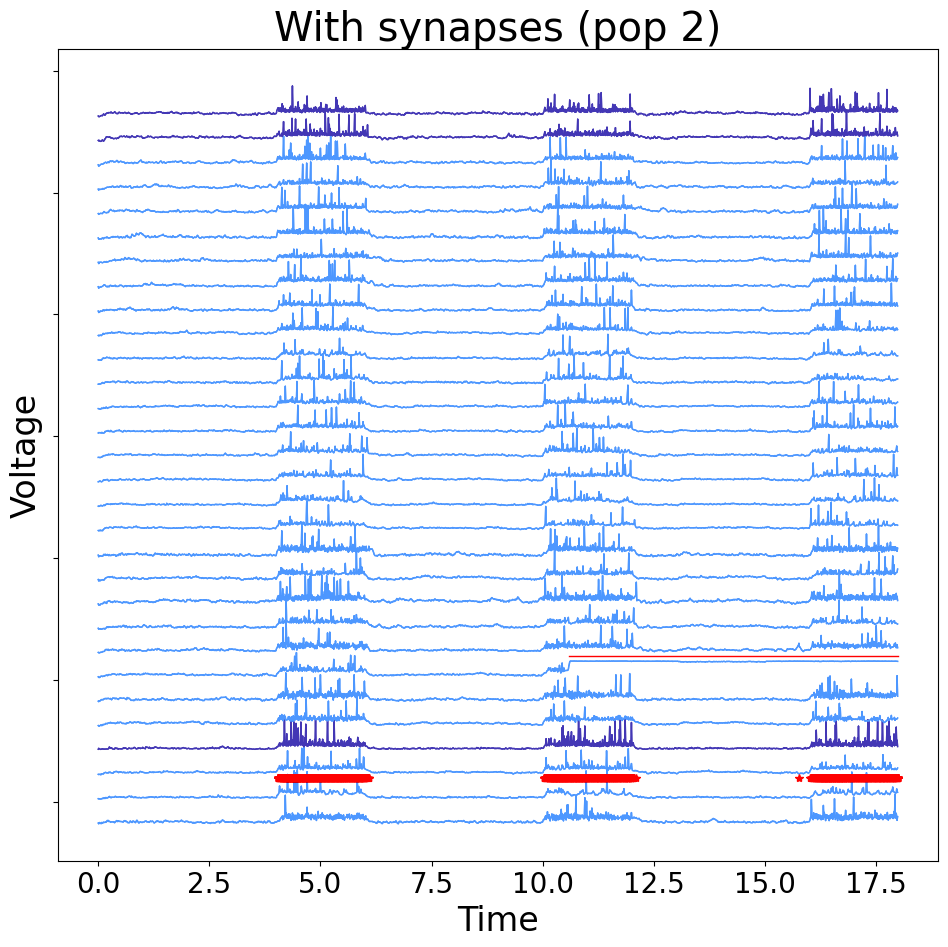

In [24]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [25]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_4/network-synapses.hdf5
Loading input info from ../networks/sten_4/input-spikes.hdf5
Loading ../networks/sten_4/simulation/output-no-synapses-sten_4-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
45: (dSPN_0, p8bf90d1f, m22be6817)
511: (LTS_0, p94d54b1c, m803558b5)
513: (LTS_1, pcec5cf27, m8ded5e00)
514: (LTS_1, p793a3d75, ma4dacccf)
516: (LTS_1, pe2b0b6c2, ma4dacccf)
565: (dSPN_0, p1863c9a5, mc710c1a4)
572: (dSPN_0, pb0529fb9, m9fda9b20)
584: (dSPN_0, pb0529fb9, m22be6817)
1021: (LTS_0, p7f931884, m803558b5)
1023: (LTS_1, p54dfea77, m8ded5e00)
1024: (FS_0, pb1ef6b01, mb1b67bcc)
1064: (dSPN_0, pb0529fb9, mf702205f)
1527: (LTS_1, pd2ca4eaf, m803558b5)
1571: (dSPN_0, p7aa400d6, mbb8e5b24)
2502: (LTS_0, p1fd33c8c, m803558b5)
2503: (LTS_0, pe9c8b984, m803558b5)
2504: (LTS_1, p047a6bb7, mda52699c)
2505: (LTS_1, p1a0c46fe, m8ded5e00)
3012: (LTS_0, p1fd33c8c, m803558b5)
3013: (LTS_0, p94d54b1c, m803

In [26]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [1053 1064 1074 1095 1162 1186 1188 1201 1209 1250 1262 1375 1384 1438
 1443 1465 1500 1505 1538 1575 1583 1698 1834 2012 2014 2015 2016 2022
 2024 2027]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_4/figures/Network-voltage-trace--dSPN-iSPN.pdf


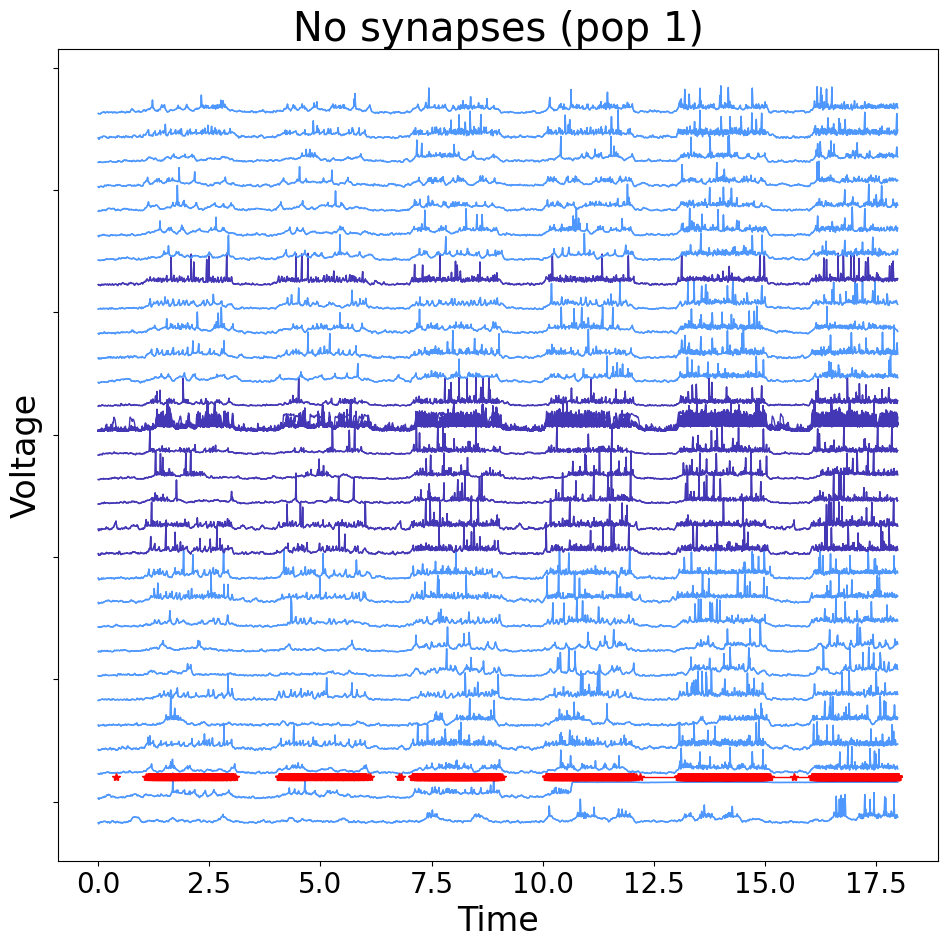

In [27]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [2563 2657 2663 2949 3049 3053 3061 3066 3083 3110 3111 3132 3148 3151
 3156 3158 3184 3185 3192 3198 3200 3204 3207 3214 3219 3230 3233 3244
 3271 3276]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_4/figures/Network-voltage-trace--dSPN-iSPN.pdf


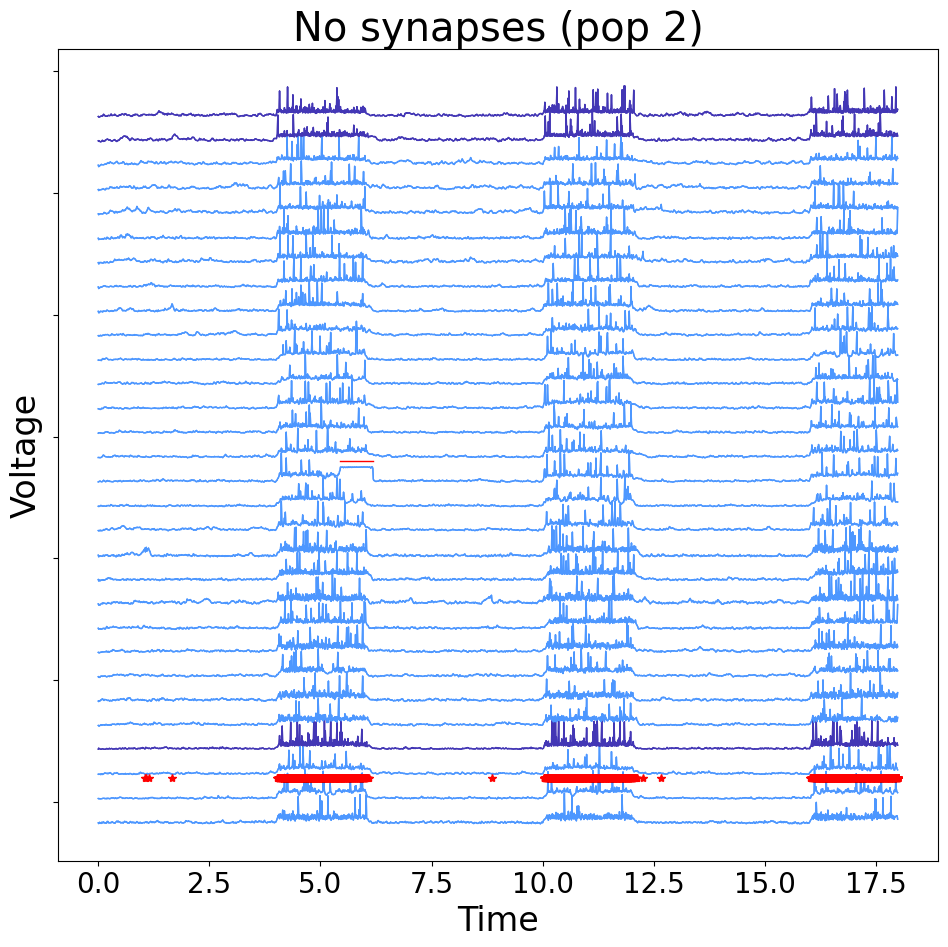

In [28]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [29]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 2536  3020  3029  3043  3055  4393  4417  4944  7600  7603  8484  8925
  8938  9369  9375 10102 10113 10119 10125 10887 12654 13456 14218 14232
 14572 14583 17046 17803 17812 17818 17830 17841 18963 22501 24060 25941
 28293 30214]
Plotted 38 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_4/figures/Network-voltage-trace--dSPN-traces.pdf


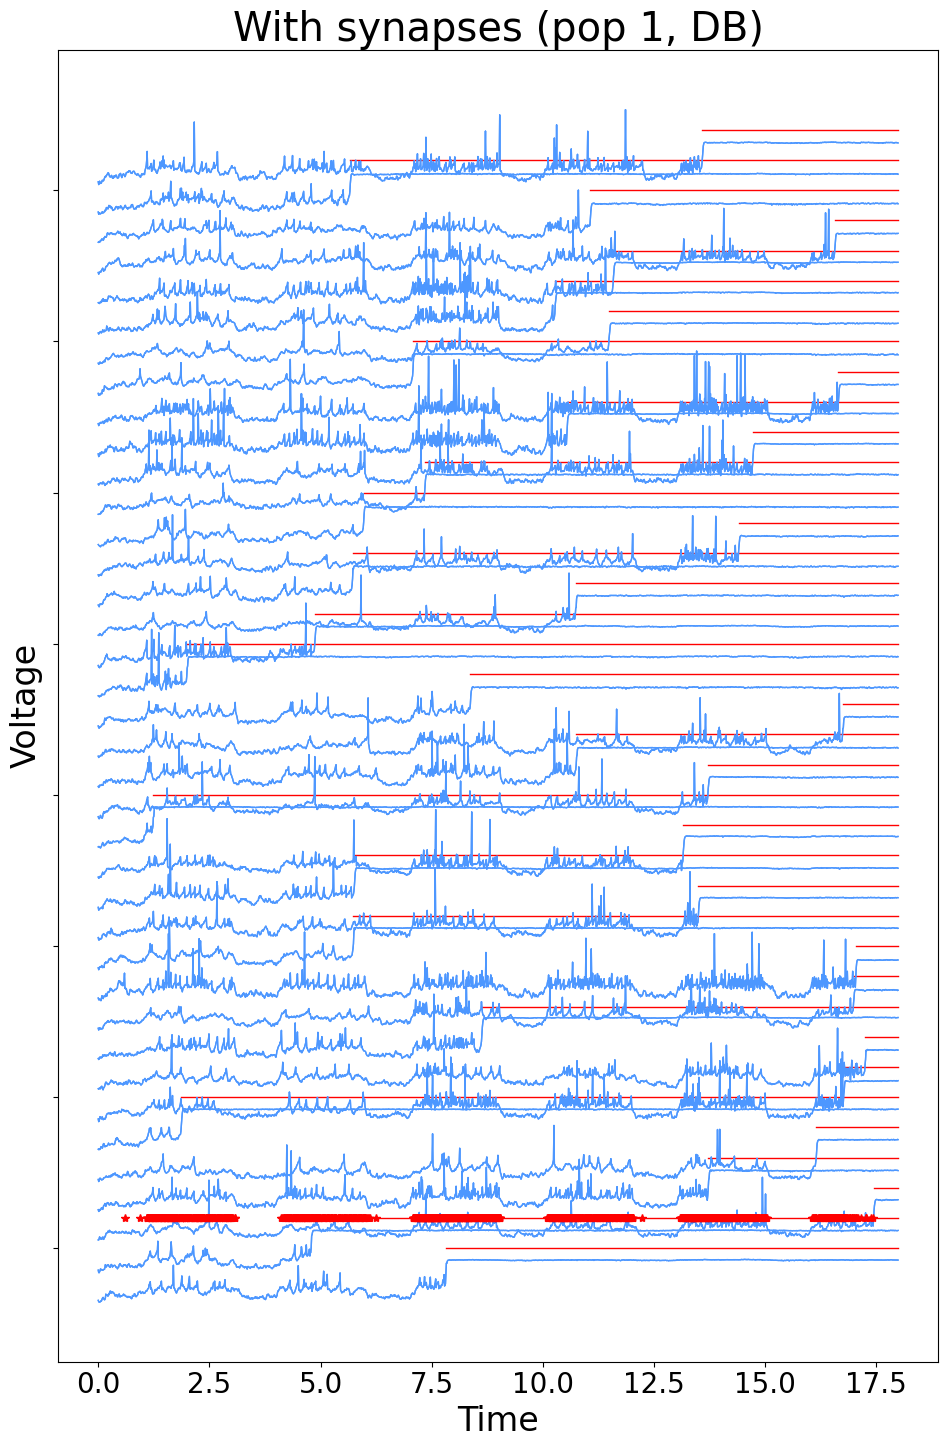

In [30]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [ 3061  4407  7225  7230  7582  7607  7609  7624  8498 10105 10116 11342
 11843 11861 16210 16599 17827 17835 17839 17840 18956 18968 21030 22052
 22466 23735 24459 25130 25533 25539 25559 25946 25955 27611 27644 27651
 28689 28690 29010 29029 29399 29404 29549 29826 30603 30616 30642 30648
 31337 32106 34208 37052 37441 37446]
Plotted 54 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_4/figures/Network-voltage-trace--dSPN-traces.pdf


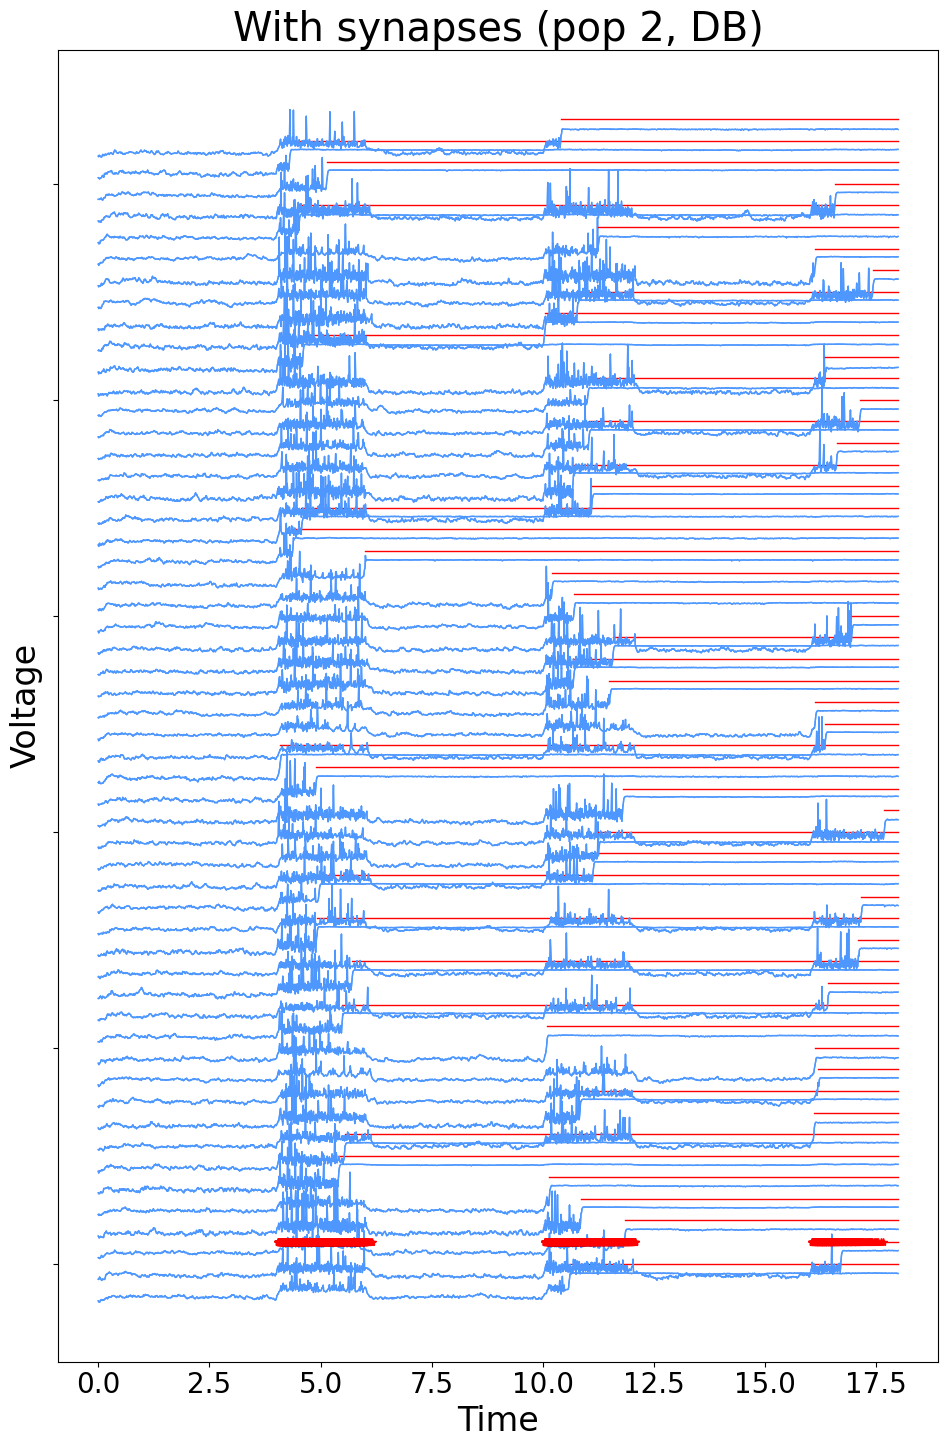

In [31]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 1064  3925  4393  4433  4928  4936  4944  5349  7600 10111 10462 11347
 11369 11392 14232 14381 14501 17016 17064 17830 18970 23337]
Plotted 22 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_4/figures/Network-voltage-trace--dSPN-iSPN.pdf


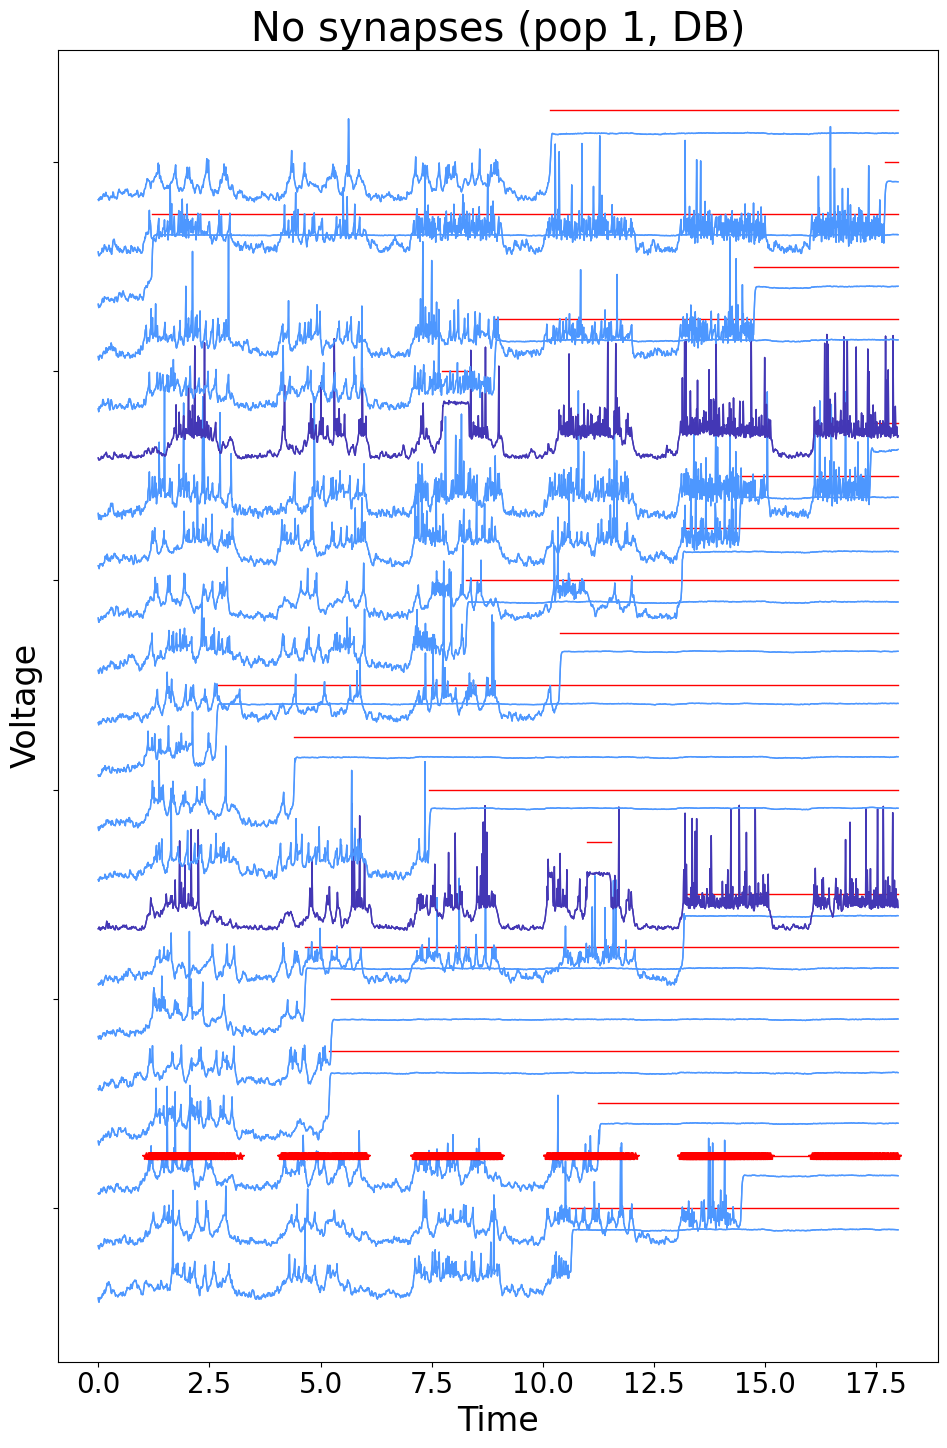

In [32]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [ 3156  7109  8835 11342 11843 14235 16572 21122 21295 22774 24036 25165
 27920 29179 29282 29410 29739 30608 32768]
Plotted 19 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_4/figures/Network-voltage-trace--dSPN-iSPN.pdf


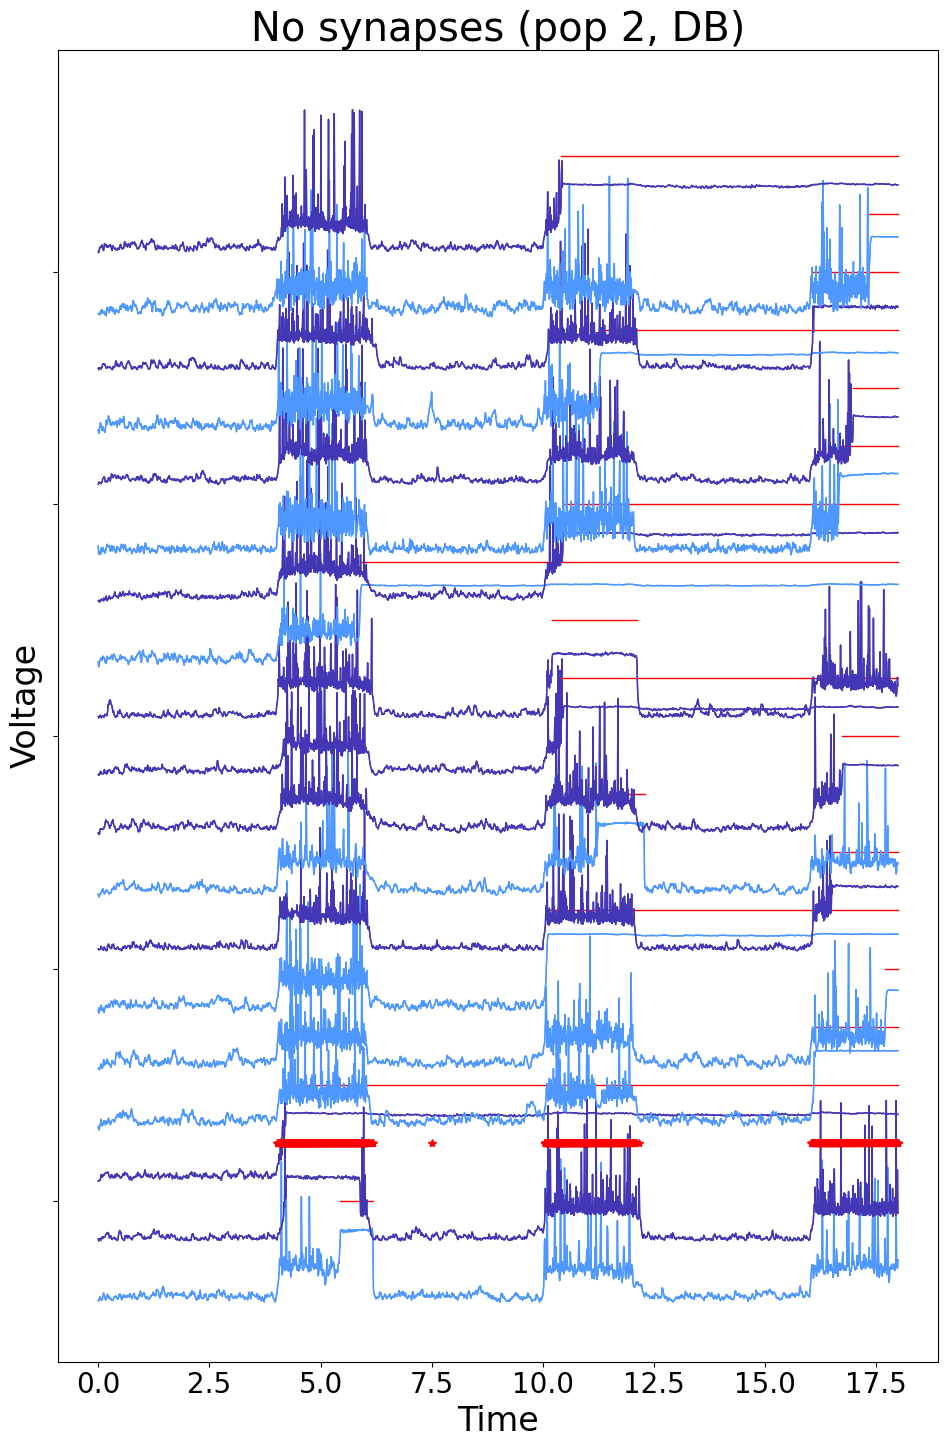

In [33]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)